# Energy Prices Stock Prices Notebook
---

# Preamble

In [45]:
# import relevant Python libraries
###
import numpy as np  #import numpy 
import pandas as pd #import pandas
from matplotlib import pyplot as plt    #import pyplot from matplotlib
from IPython.display import display, Latex  #import display and Latex from IPython.display
from sklearn import preprocessing as sklpp #import preprocessing from sklearn with alias sklpp
from sklearn import decomposition as skldecomp  #import decomposition from sklearn with alias skldecomp
from sklearn.model_selection import train_test_split #import train_test_split from sklearn.model_selection
import matplotlib.ticker as mticker #import mticker from matplotlib.ticker
from sklearn.model_selection import cross_validate #import cross_val_score from sklearn.model_selection
from sklearn.linear_model import Ridge, Lasso, LinearRegression #import Ridge, Lasso from sklearn.linear_model
import time #import time
from sklearn.metrics import r2_score #import r2_score
###

# **1. Brief Exploration of Dataset**

In [46]:
energy_prices_dataset = pd.read_csv("energy_dataset.csv") #read energy dataset into a csv
print(energy_prices_dataset.head(10)) #print first 10 rows of dataframe just for exploration

                        time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   
5  2015-01-01 05:00:00+01:00               410.0   
6  2015-01-01 06:00:00+01:00               401.0   
7  2015-01-01 07:00:00+01:00               408.0   
8  2015-01-01 08:00:00+01:00               413.0   
9  2015-01-01 09:00:00+01:00               419.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                               

_[The first code cell here is to simply load the energy prices data into a pandas dataframe. Then, I will print the dataframe just to get a feel for what the dataframe contains. ]_

In [47]:
n, p = energy_prices_dataset.shape #get number of rows/columns in dataframe
print(f"Number of Rows in Dataframe: {n}") #number of rows in dataframe
print(f"Number of Columns in data: {p}") #number of columns in dataframe

Number of Rows in Dataframe: 35064
Number of Columns in data: 29


_[To briefly explore this dataset, the first thing I wanted to do was first calculate the total number of rows in my dataframe and the total number of columns in my dataframe. There are a total of 35064 rows in this dataframe. This means that the dataframe contains data across 35064 different hourly points that electrical consumption data was measured. There are 29 columns in the dataframe. 

Time - datetime local to Central European Time (CET)

Generation biomass - Biomass generation in MW

Generation fossil brown coal / lignite - coal/lignite generation in MW

Generation fossil coal-derived gas - coal gas generation in MW

Generation fossil gas - gas generation in MW

Generation fossil hard coal - coal generation in MW

Generation fossil oil - oil generation in MW

Generation fossil oil shale - shale oil generation in MW

Generation fossil peat - peat generation in MW

Generation geothermal - geothermal generation in MW

Generation hydro pumped storage aggregated - hydro1 generation in MW

Generation hydro pumped storage consumption - hydro2 generation in MW

Generation hydro run-of-river and poundage - hydro3 generation in MW

Generation hydro water reservoir - hydro4 generation in MW

Generation marine - sea generation in MW

Generation nuclear - nuclear generation in MW

Generation other - miscellaneous generation in MW

Generation other renewables - miscellaneous renewable generation in MW

Generation solar - solar generation in MW

Generation waste - waste generation in MW

Generation wind offshore - offshore wind generation in MW

Generation wind onshore - onshore wind generation in MW

Forecast solar day ahead - forecasted solar generation by Transmission Service Operator (Red Electric España) in Spain

Forecast wind offshore generation - forecasted offshore wind generation by Transmission Service Operator (Red Electric España) in Spain

Forecast wind onshore generation - forecasted onshore wind generation by Transmission Service Operator (Red Electric España) in Spain

Total load forecast - forecasted total electrical demand by Transmission Service Operator (Red Electric España) in Spain

Total load actual - actual electrical demand

Price a day ahead - forecasted price by Transmission Service Operator (Red Electric España) in Spain 

Price actual - current price as reported by Transmission Service Operator ( Red Electric Espana ) in Spain]_

In [48]:
valuesMissing = energy_prices_dataset.isna().sum().sum() #Compute total number of Cells with Missing Values
print(f"Number of missing values: {valuesMissing}") #print number of cells with missing values

Number of missing values: 70529


_[The next step is to calculate the number of cells with missing values(i.e. empty cells). Unfortunately, our dataset has 70529 missing values]_

In [49]:
#iterate through columns
for column in energy_prices_dataset:
    missingValues = energy_prices_dataset[column].isna().sum() #calculate number of missing values in that column
    
    #if number of missing values > 0, print the column name along with number of missing values
    if missingValues > 0:
        print(f"The column {column} has {missingValues} missing values")

The column generation biomass has 19 missing values
The column generation fossil brown coal/lignite has 18 missing values
The column generation fossil coal-derived gas has 18 missing values
The column generation fossil gas has 18 missing values
The column generation fossil hard coal has 18 missing values
The column generation fossil oil has 19 missing values
The column generation fossil oil shale has 18 missing values
The column generation fossil peat has 18 missing values
The column generation geothermal has 18 missing values
The column generation hydro pumped storage aggregated has 35064 missing values
The column generation hydro pumped storage consumption has 19 missing values
The column generation hydro run-of-river and poundage has 19 missing values
The column generation hydro water reservoir has 18 missing values
The column generation marine has 19 missing values
The column generation nuclear has 17 missing values
The column generation other has 18 missing values
The column gener

This cell indicates the columns in the dataframe that have missing values. 

The column generation biomass has 19 missing values

The column generation fossil brown coal/lignite has 18 missing values

The column generation fossil coal-derived gas has 18 missing values

The column generation fossil gas has 18 missing values

The column generation fossil hard coal has 18 missing values

The column generation fossil oil has 19 missing values

The column generation fossil oil shale has 18 missing values

The column generation fossil peat has 18 missing values

The column generation geothermal has 18 missing values

The column generation hydro pumped storage aggregated has 35064 missing values

The column generation hydro pumped storage consumption has 19 missing values

The column generation hydro run-of-river and poundage has 19 missing values

The column generation hydro water reservoir has 18 missing values

The column generation marine has 19 missing values

The column generation nuclear has 17 missing values

The column generation other has 18 missing values

The column generation other renewable has 18 missing values

The column generation solar has 18 missing values

The column generation waste has 19 missing values

The column generation wind offshore has 18 missing values

The column generation wind onshore has 18 missing values

The column forecast wind offshore eday ahead has 35064 missing values

The column total load actual has 36 missing values

The column time can not be represented as a histogram


/Users/raviraghavan/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


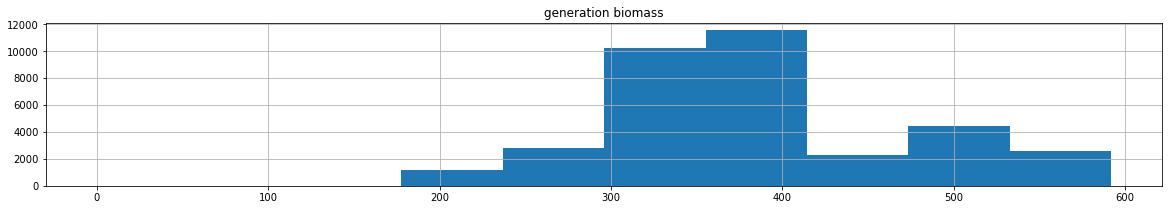

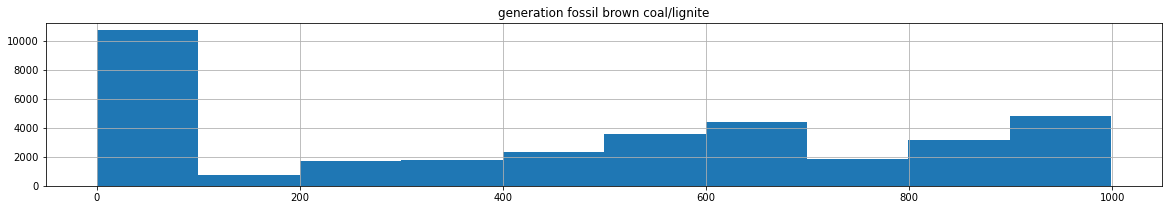

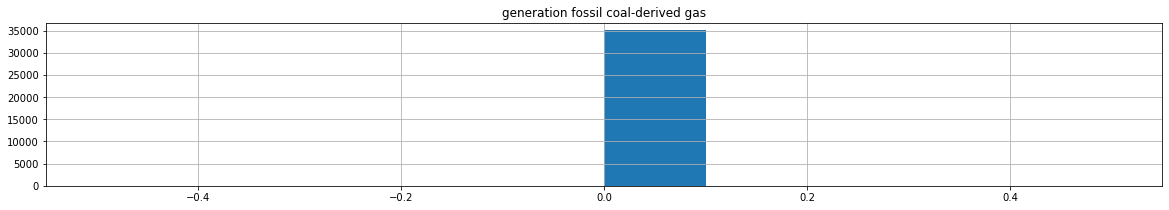

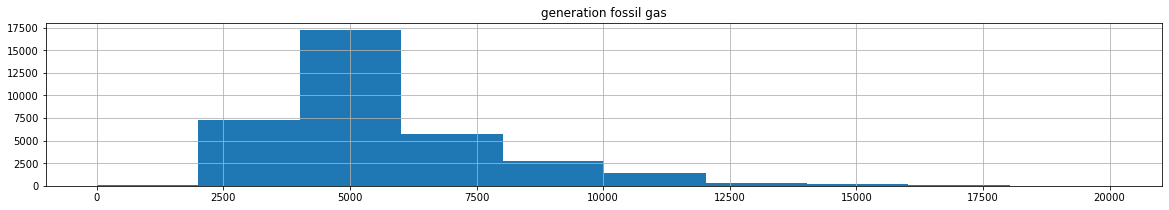

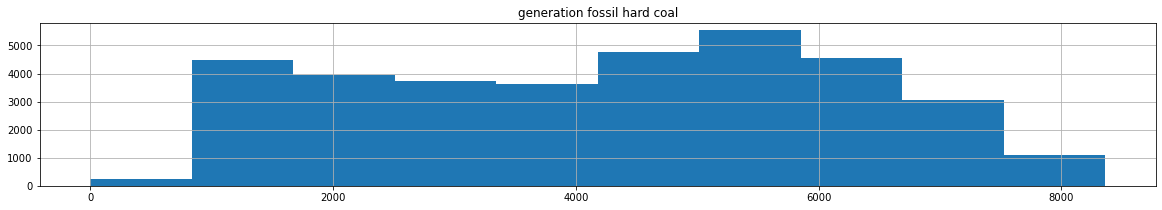

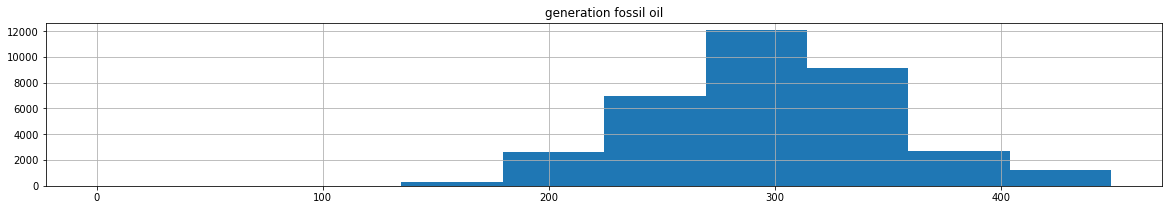

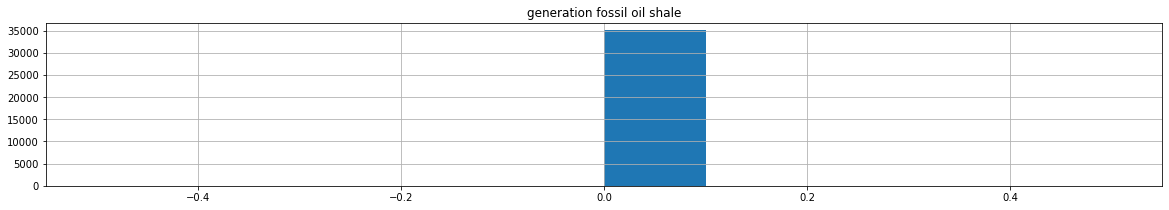

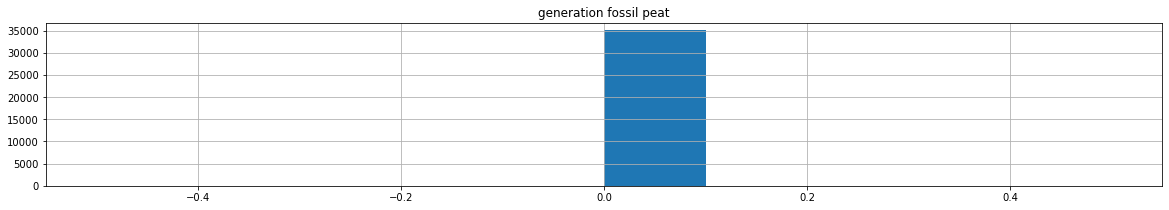

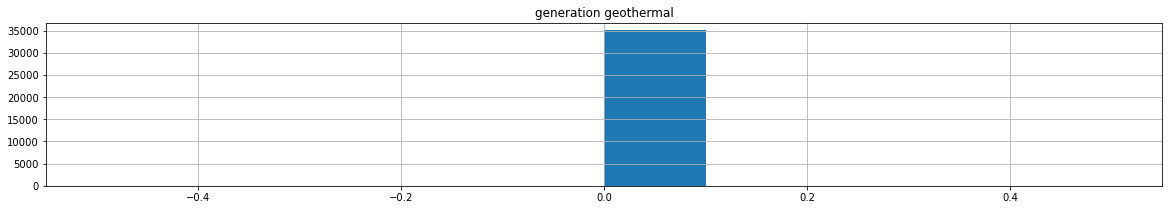

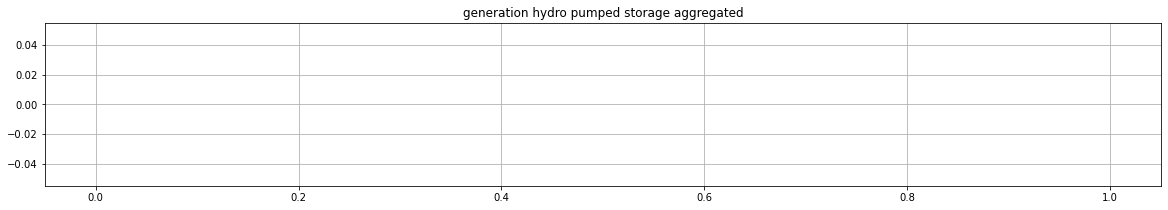

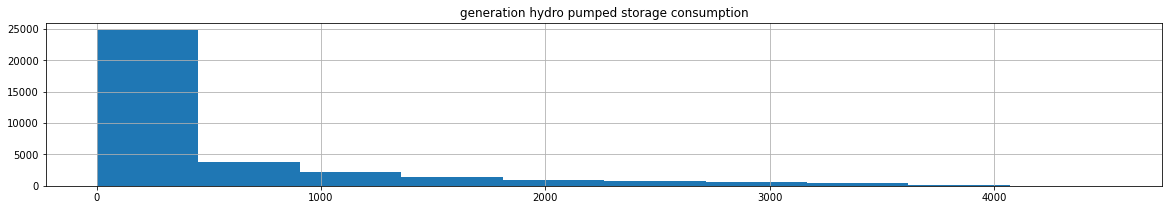

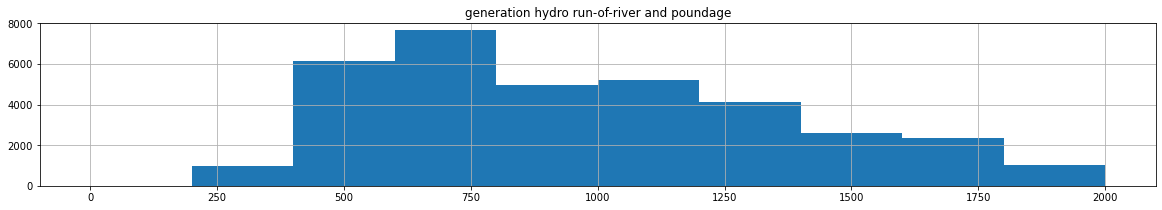

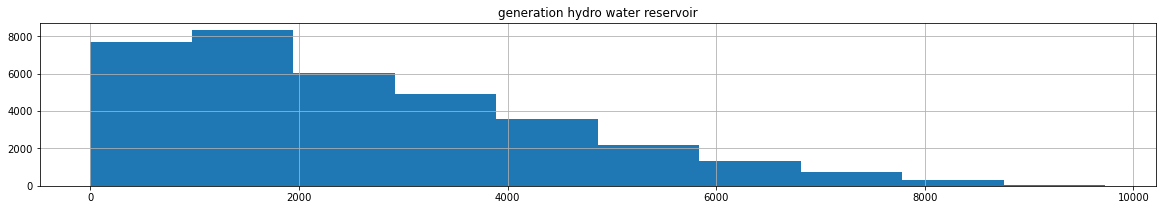

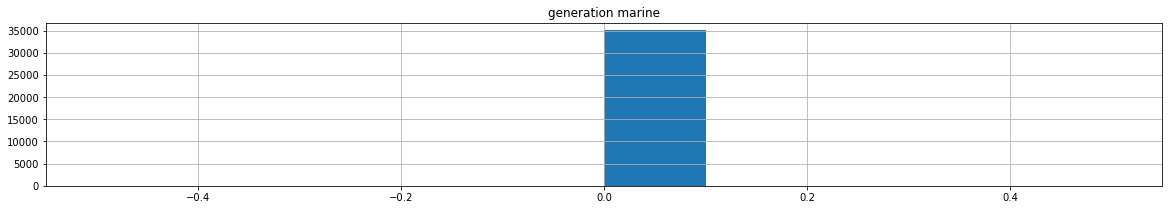

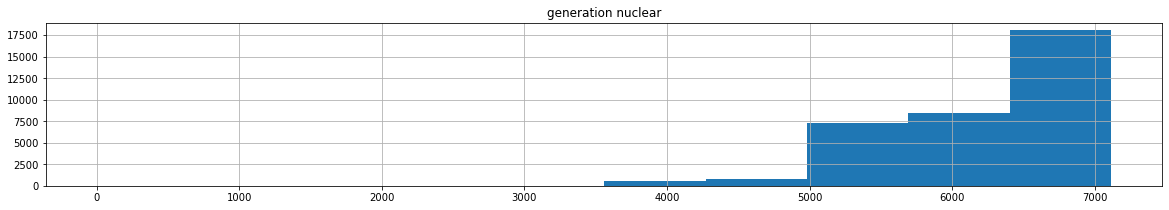

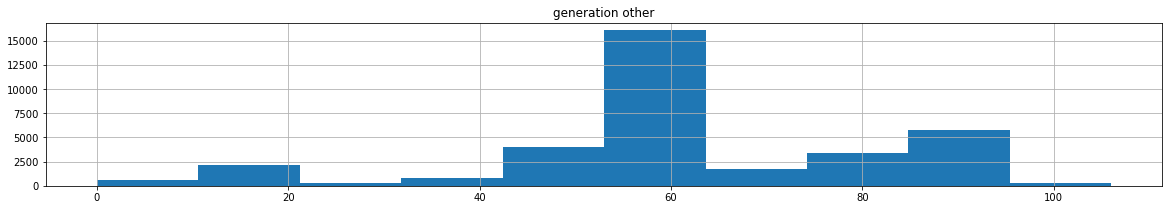

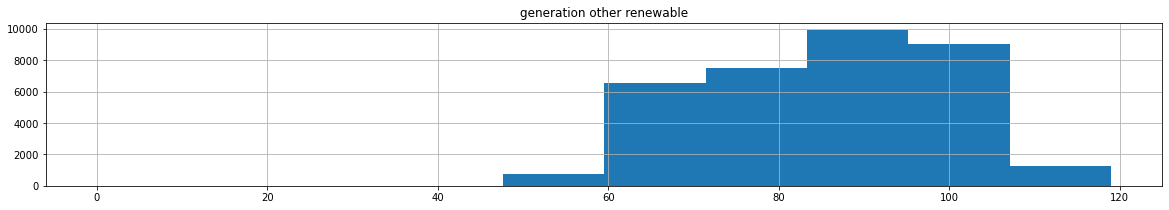

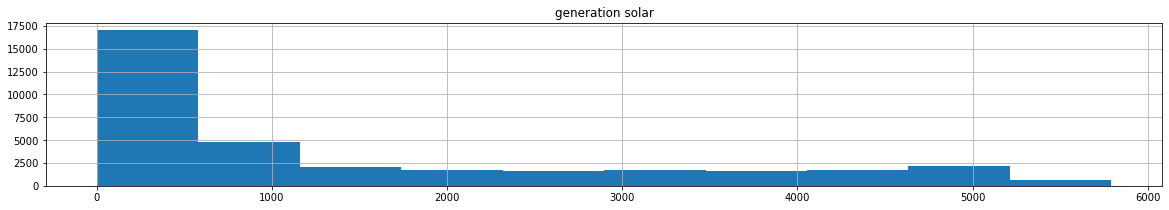

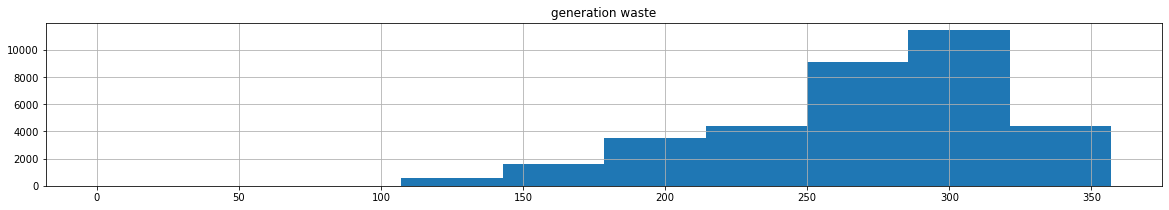

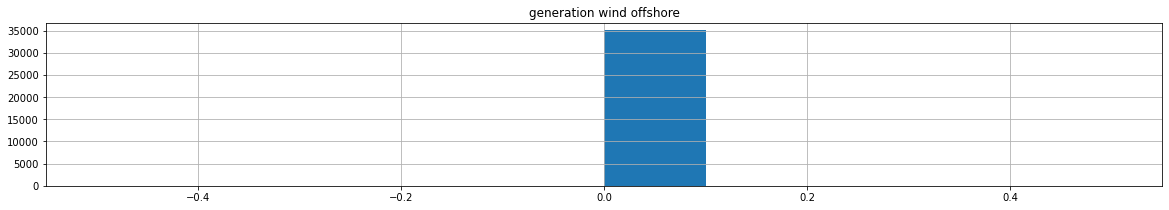

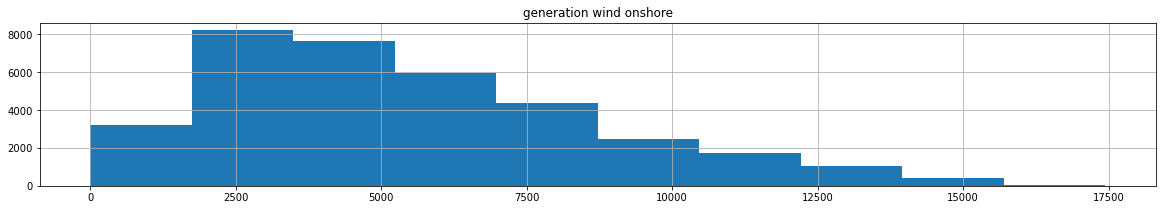

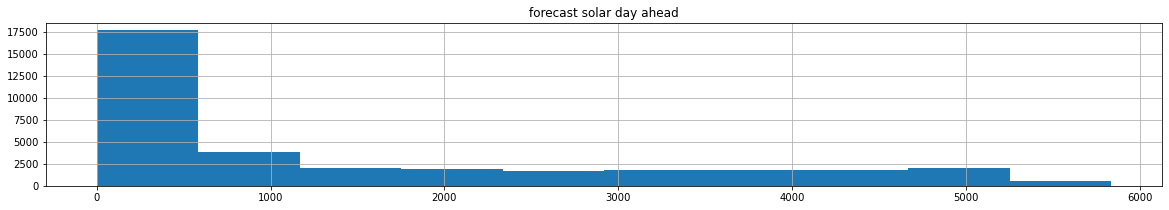

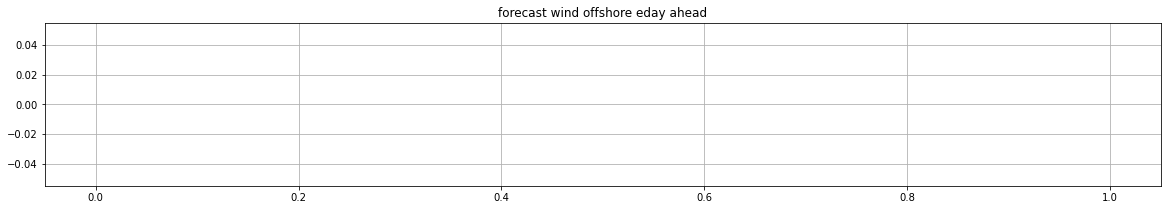

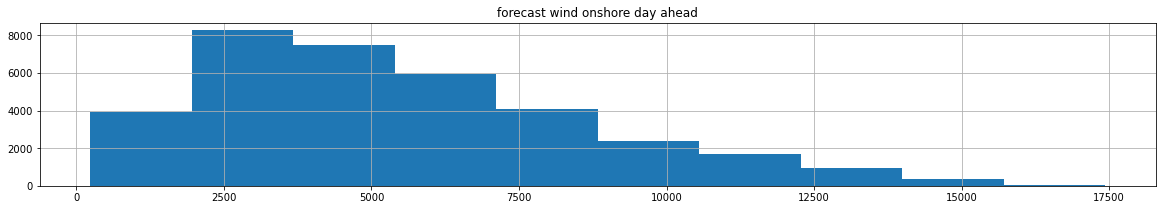

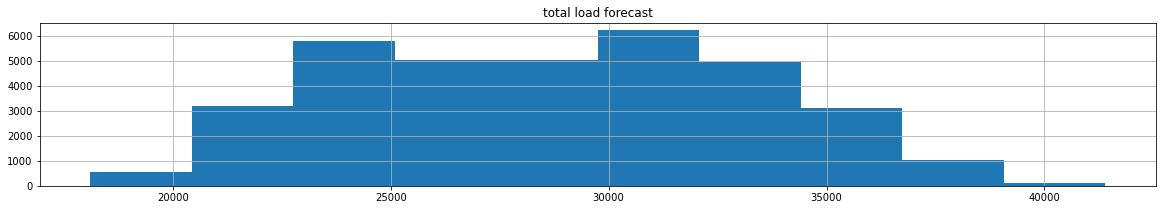

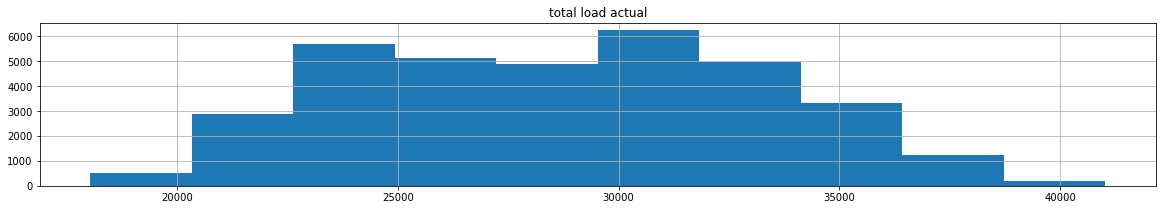

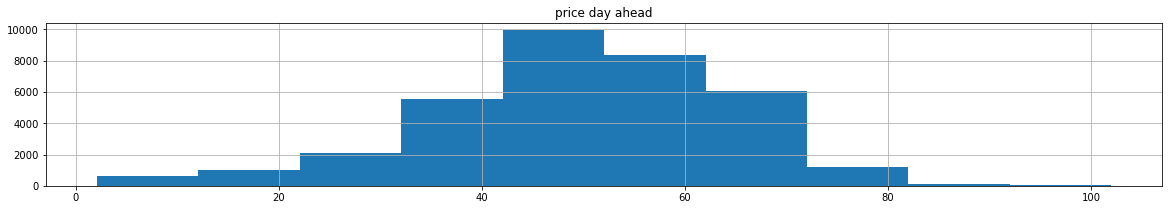

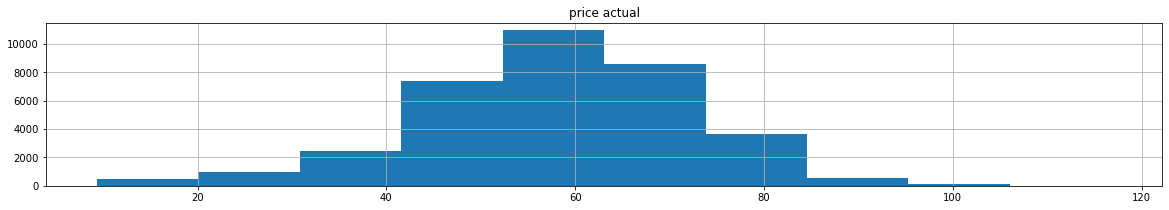

In [50]:
#iterate through columns in dataframe
for column in energy_prices_dataset.columns:
    try:      
        energy_prices_dataset[column] = pd.to_numeric(energy_prices_dataset[column]) #try to numericize column
        energy_prices_dataset.hist(column) #display histogram as column
    
    #handle error
    except ValueError:
        print(f"The column {column} can not be represented as a histogram")

These histograms show that all our columns, obviously besides the time column, are supposed to be numerical columns. Hence, I see no need here for one-hot encoding. However, there is something important that must be addressed. As shown by these histograms, the columns "forecast wind offshore eday ahead" and "generation hydro pumped storage aggregated" are entirely empty. Hence, the appropriate thing to do would be to drop these columns when we are pre-processing the data. 

Text(0.5, 1.0, 'Energy Prices.')

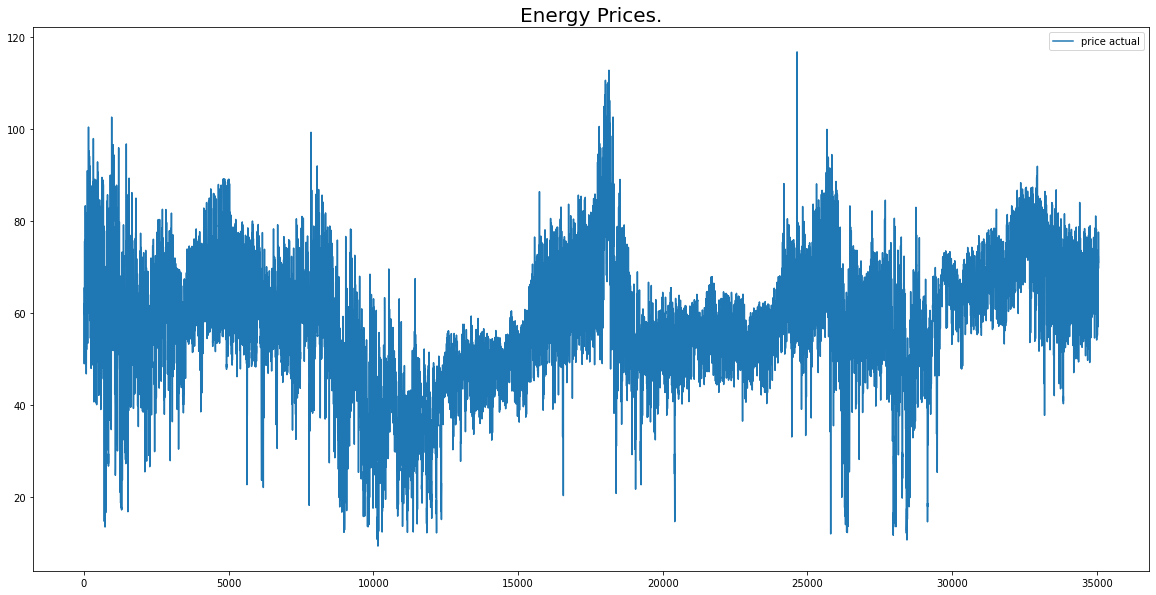

In [51]:
energy_prices_dataset[['price actual']].plot(figsize= (20, 10)) #plot price
plt.title("Energy Prices.", fontsize = 20)  #set plot parameters(i.e. size of plot)

The purpose of this code cell was just to plot the energy prices for the entire dataset. I just wanted to get a brief intuition for the general trend in energy price. 

# **2. Pre-processing of Dataset**

In [52]:
energy_prices_dataset.drop(columns = ['generation hydro pumped storage aggregated', 
                            'forecast wind offshore eday ahead'], inplace = True) #drop these columns since they are entirely empty 


energy_prices_dataset.drop(columns = ["price day ahead"], inplace = True) #drop this column since we are not interested in performing a forecast, 
#we are interested in predicting the hourly Electrical Price based on the features we are given

energy_prices_dataset.set_index("time", inplace = True) #set the time variable as an index

energy_prices_dataset.interpolate(inplace = True) #interpolate to fill in NaN

The first thing we did was to drop the columns "generation hydro pumped storage aggregated" and "forecast wind offshore eday ahead" since they were completely empty and there was absolutely no way for the team to determine what values should even be there. Next, since our goal in this problem is not a forecasting problem(i.e. forecasting was already done for Netflix Stock Prices!), we removed the column "price day ahead" as well since we do not need to use this. Finally, we set the time column as the index of the dataframe since electrical consumption data is collected by the hour and the "hour" essentially serves as an identifier for each data sample. Finally, to replace NaN values, we decided to use the interpolate() function. Here is a brief description of the interpolate function. Essentially if there were NaN values between non-NaN values, the function interpolate() draws a line between the NaN values and replaces the NaN values with values on this line. The reason we did this is because data is being collected on an hourly basis. Hence, our reasoning was that data collected at a particular time period is more likely to be similar to the data gathered at the previous/following hour than the data gathered several hours/days later/earlier. This was our reasoning for using interpolate() to fill in NaN values. 

# **3. Feature Engineering / Feature Learning**

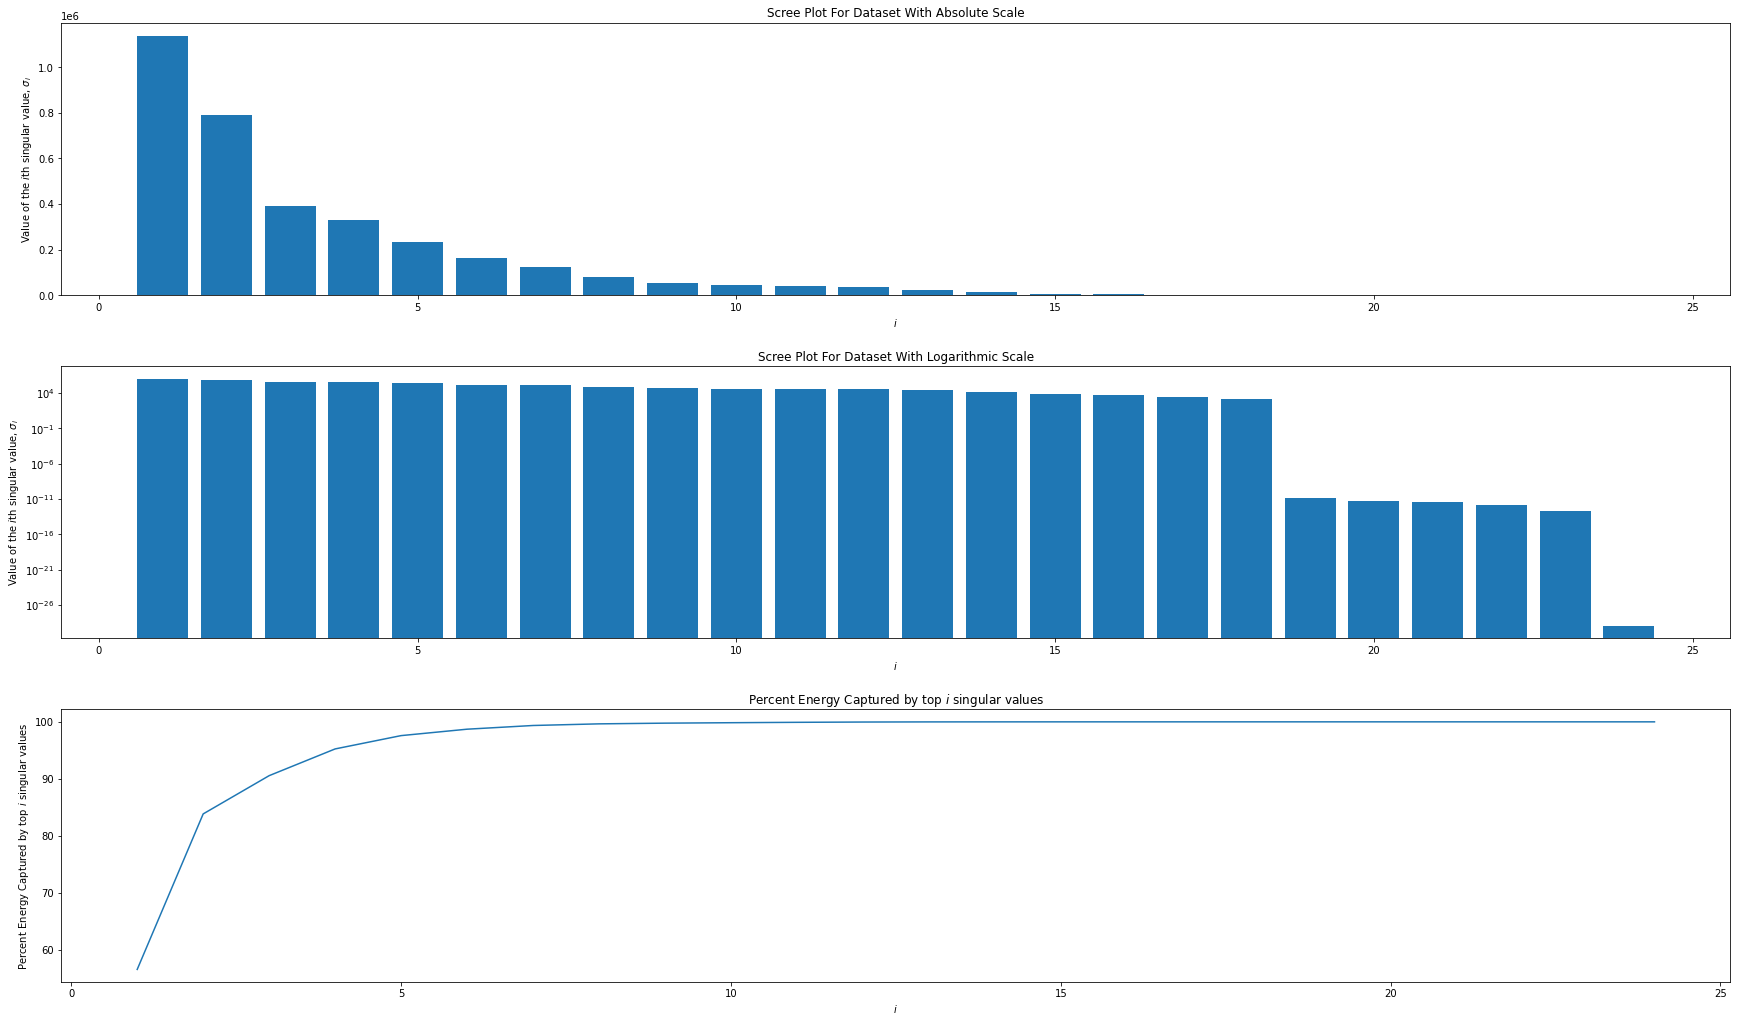

In [53]:
features = [columnName for columnName in energy_prices_dataset.columns if columnName != "price actual"] #get features
label = ["price actual"] #get label

#convert features/labels from pandas dataframe to numpy matrices
X = energy_prices_dataset[features].to_numpy()
Y = energy_prices_dataset[label].to_numpy()

#split data into train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=104, test_size=0.20, shuffle=True) #split data into remaining/test

datascaler = sklpp.StandardScaler(with_mean = True, with_std = False) #initialize Standard Scaler object
X_train = datascaler.fit_transform(X_train) #fit it to training data and transform
X_test = datascaler.transform(X_test) #transform test data

left_singular_vectors, singular_value_matrix, right_singular_vectors = np.linalg.svd(X_train)   #svd of centered matrix
total_energy = sum([singular_value * singular_value for singular_value in singular_value_matrix]) #total energy in centered dataset

cumulative_energy = 0   #initialize variable
k_values = [] #initialize array
percent_energy_captured = [] #initialize array
k = 0   #initialize k
for index in range(len(singular_value_matrix)):
    cumulative_energy = cumulative_energy + (singular_value_matrix[index] * singular_value_matrix[index])   #calculate energy of top k singular values
    k = k + 1   #increment k
    k_values.append(k) #append k to array
    percent_energy_captured.append((100 * cumulative_energy / total_energy)) #append percent energy captured cumulatively to the array



#Generate Scree Plot for dataset with absolute scale 
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (25, 15))
fig.tight_layout(pad=5.0)

ax1.set_title("Scree Plot For Dataset With Absolute Scale")
ax1.set_xlabel("$i$")
ax1.set_ylabel('Value of the $i$th singular value, $\sigma_i$')
ax1.bar(k_values, singular_value_matrix)

#Generate Scree Plot for dataset with logarithmic scale 
ax2.set_title("Scree Plot For Dataset With Logarithmic Scale")
ax2.set_xlabel("$i$")
ax2.set_ylabel('Value of the $i$th singular value, $\sigma_i$')
ax2.set_yscale("log")
ax2.bar(k_values, singular_value_matrix)

#Plot Percent Energy Captured
ax3.set_title("Percent Energy Captured by top $i$ singular values")
ax3.set_xlabel("$i$")
ax3.set_ylabel("Percent Energy Captured by top $i$ singular values")
ax3.plot(list(range(1, len(percent_energy_captured) + 1)), percent_energy_captured)

pca = skldecomp.PCA(n_components = 4, svd_solver = 'full')  #initialize PCA object with 4 components
X_train = pca.fit_transform(X_train) #map remaining data points onto PCA subspace
X_test = pca.transform(X_test) #map test data points onto same PCA subspace


Why was PCA used on the data matrix? 

In order to determine whether PCA was needed on my data matrix, I calculated the SVD of my data matrix X. As we learned during our studies of PCA, the singular values of X are the square root of the eigenvalues of $X^TX$. Hence, we can analyze the singular values of X to determine what percentage of the total energy is captured by the top K eigenvalues of $X^TX$. As shown by graph, the top 4 eigenvalues capture roughly 95 percent of the total energy in the dataset. Hence, we can take the data from the original 24 dimensional space and map it to a 4 dimensional subspace within this 24 dimensional space. Since we will be capturing roughly 95 percent of the total energy in the dataset, the projected data samples will still retain almost all of the original variation from the dataset that was present in 24 dimensions. Hence, this is why I conducted PCA with the number of components being 4 


Prior to applying PCA, I mean centered the data as we learned during the lectures. 

Explanations of scikit learn functions I used in this part of the project: 
train_test_split: Split a batch of data into training and test data. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=104, test_size=0.20, shuffle=True) split data into remaining/test

This line takes the data(i.e. features are in X and labels are in Y) and creates X_test(features for test data), Y_test(labels for test data). test_size = 0.20 means that this method takes 20 percent of the original data and sets it aside as test data. shuffle = True means that this function shuffles the data before splitting into train/test to avoid being too deterministic in its split 

Other parameters for train_test_split include train_size(specifies how big training split should be), random_state(controls shuffling of data), stratify(stratified split essentially makes data of different labels occur in roughly equal portions in the training/test/validation data set)

StandardScaler(), fit_transform, transform: 

this is responsible for centering the data. fit_transform() will fit to the data and then center the data
transform will center the data based on the mean already computed by fit_transform()

skldecomp.PCA(), fit_transform, transform, inverse_transform(): 
PCA() is responsible for doing PCA()

fit_transform() will fit to the data and project the points onto a PCA subspace of minimal projection error 
transform will project the points onto a PCA subspace already determined by fit_transform 
inverse_transform takes the data points on the PCA subspace and represented them in the original dimension

# **4. Processing The Dataset Via Machine Learning**

First, we will determine the best $\alpha$ parameters for Ridge and Lasso regression by cross validation.

In [54]:
alphas_model1 = np.linspace(0.1, 1000, 1000, endpoint = False) #create alphas for Ridge Regression cross validation testing

cross_validation_scores_model1 = [cross_validate(Ridge(alpha), X_train, Y_train) for alpha in alphas_model1] #compute cross validation scores for each alpha for Ridge Regression
mean_validation_scores_model1 = [data["test_score"].mean() for data in cross_validation_scores_model1] #compute mean of cross validation scores
std_validation_scores_model1 = [data["test_score"].std() for data in cross_validation_scores_model1] #compute standard deviation of cross validation scores
best_alpha_model1 = alphas_model1[np.argmax(mean_validation_scores_model1)] #determine which alphs gives us best cross validation score

print(f"Best Value of Alpha for Ridge Regression: {best_alpha_model1}") #print statement

alphas_model2 = np.linspace(0.1, 1000, 1000, endpoint = False) #create alphas for Ridge Regression cross validation testing
cross_validation_scores_model2 = [cross_validate(Lasso(alpha), X_train, Y_train) for alpha in alphas_model2] #compute cross validation scores for each alpha for Lasso Regression
mean_validation_scores_model2 = [data["test_score"].mean() for data in cross_validation_scores_model2] #compute mean of cross validation scores
std_validation_scores_model2 = [data["test_score"].std() for data in cross_validation_scores_model2] #compute standard deviation of cross validation scores
best_alpha_model2 = alphas_model2[np.argmax(mean_validation_scores_model2)] #determine which alphs gives us best cross validation score

print(f"Best Value of Alpha for Lasso Regression: {best_alpha_model2}") #print statement 

Best Value of Alpha for Ridge Regression: 999.0001000000001
Best Value of Alpha for Lasso Regression: 5.0995


In this section of the project, the requirement is to "process the dataset using two different machine learning methods". Given that my task here is to predict the price of NFLX Stock using regression methods, the machine learning methods I have chosen is Ridge and Lasso Regression.

Let's do the analysis for Ridge and Lasso Regression. In Ridge Regression, we are trying to solve the following equation: 
$$\beta = \underset{\beta \in \mathbb{R}^{p + 1}}{\operatorname{argmin}} \enspace ||Y - X \beta||_2^2 + \lambda ||\beta||_2^2$$

The solution to this Ridge Regression Equation is: 
$$ (X^TX + \lambda I)^{-1} X^T Y$$

Similarly, for Lasso Regression, the equation is 
$$\beta = \underset{\beta \in \mathbb{R}^{p + 1}}{\operatorname{argmin}} \enspace ||Y - X \beta||_2^2 + \lambda ||\beta||_1$$

However, this begs the question as to what do we make $\lambda$

I wanted to test $\lambda$ values from 0.1 to 1000 since, if I make it too big, the term $\lambda ||\beta||_2^2$(i.e. for Ridge Regression) or $\lambda ||\beta||_1$(i.e. for Lasso Regression) begins to dominate the aforementioned equations. 


As we learned in class, whenever we have such parameters, the best approach is to do cross validation. I will explain the overall procedure I followed for Cross Validation: 

Note: In Section 3, I used scikit-learn's function to take the original dataset and split it into X_train, X_test, Y_train, and Y_test. X_test(i.e. features for test data) and Y_test(i.e. labels for test data) is the test data that will be used in section 5 to report the performance of the model on "unseen data". Hence, it will be used to indicate the model's generalization error. Hence, X_test and Y_test will be untouched for this section. 

Given that I have X_train and Y_train(i.e. remaining features/labels once the test data has already been extracted and aside), I will be using X_train and Y_train to run K-Fold Cross Validation 

As per the project instructions, the team was given explicit permission to use scikit-learn. To perform K-Fold cross validation, I used the scikit-learn function "cross_validate". Let me explain, in detail, what this function does. 

The list of parameters for this function are as follows: 
estimator: This is basically the model that we are performing cross validation for. In my case, it is the Ridge model(i.e. represents Ridge Regression) and Lasso(i.e. represents Lasso Regression). I will elaborate more on the Ridge and Lasso constructors from sklearn later onwards 
X: array of features(i.e. features for each sample should be on each row of this matrix)
Y: array of labels(i.e. each row is the label for the corresponding data sample in the same row of X)
groups: specify groups(i.e. classes) such that these groups are not split across training/test sets during cross validation. Not applicable for this case
scoring: Scoring strategy to evaluate model while doing cross validation(e.g. R2 Score for Linear Regression Models)
cv: Used to modify cross validation splitting strategy. If we pass in no value for cv, the default 5 fold cross validation is use. We can also pass in a number indicating the number of folds we would like to perform. We can also pass in a CV Splitter to specialize the way we would like to split our data during cross validation. Finally, we can also pass in an iterator that gives us (train, test) splits as such. 
n_jobs: Number of jobs to run in parallel. This enables us to parallelize all the iterations of training the model and computing the scores. Setting this parameter to None just means we will be running only 1 job in parallel(i.e. essentially sequentially)
verbose: Determines how we want to print progress messages as we are performing K-Fold Cross Validation. Default is 0(i.e. print no progress messages)
fit_params: parameters with which we call fit() for the model
pre_dispatch: number of jobs that we dispatch during parallel execution
return_train_score: If set to true, return the training scores computed during K-Fold Cross Validation. Default is False
return_estimator: If set to true, return the models fitted during each iteration of K-Fold Cross Validation. Default is False
error_score: Denotes what score to assign when there is an error in training the model. Default is np.nan(i.e. Not a Number)

Returns: training_scores(if return_train_score = True), test_scores(i.e. test scores computed during K-Fold Cross Validation), fit_time(i.e. time needed to train model during each split), score_time(i.e. time taken to compute score during each split), estimator(if return_estimator = True, we return the estimator fitted during each split)


Hence, in my code, I set the parameter "estimator" to Ridge(alpha) meaning I want to use a Ridge Regression estimator with the $\lambda = alpha$
I set the parameter "X" equal to X_train and "Y" equal to Y_train since I wanted to use all the data(i.e. except for test data) as data for cross validation

The rest of the variables I set to the default options since I wanted to run 5 Fold Cross Validation

Discussion about Ridge(alpha):
Creates Ridge Regression model with $\lambda = alpha$

other parameters for Ridge():
fit_intercept, default is True
True if we want our linear regression model to have an intercept. False, if we don't need intercept(i.e. data is already centered) 

copy_X, default=True
If we don't want X to be overwritten set this parameter to True. Else, it may be overwritten

max_iterint, default=None
"Maximum number of iterations for conjugate gradient solver. For ‘sparse_cg’ and ‘lsqr’ solvers, the default value is determined by scipy.sparse.linalg. For ‘sag’ solver, the default value is 1000. For ‘lbfgs’ solver, the default value is 15000"

tolfloat, default = 1e-4
Indicates how precise we want our solution to be

I set fit_intercept to its default value of True. I did run the PCA Algorithm in section 3 so we know that our transformed data points lie on a 2 dimensional subspace in our original 5 dimensional space. However, we have no guarantee that these points are centered on this subspace. Hence, to be safe, I just set fit_intercept to its default value of True 


I let copy_X be true(default value) just in case I need to use X again
I left max_iterint to be at its default value to let the gradient solver use as many iterations as it needs
I left the tolfloat parameter to be its default because there was no need to change it 


Discussion about Lasso(alpha):
Creates Lasso Regression model with $\lambda = alpha$

other parameters for Lasso():
fit_intercept, default is True
True if we want our linear regression model to have an intercept. False, if we don't need intercept(i.e. data is already centered) 

copy_X, default=True
If we don't want X to be overwritten set this parameter to True. Else, it may be overwritten

max_iterint, default=None
"Maximum number of iterations for conjugate gradient solver. For ‘sparse_cg’ and ‘lsqr’ solvers, the default value is determined by scipy.sparse.linalg. For ‘sag’ solver, the default value is 1000. For ‘lbfgs’ solver, the default value is 15000"

tolfloat, default = 1e-4
Indicates how precise we want our solution to be

I set fit_intercept to its default value of True. I did run the PCA Algorithm in section 3 so we know that our transformed data points lie on a 2 dimensional subspace in our original 5 dimensional space. However, we have no guarantee that these points are centered on this subspace. Hence, to be safe, I just set fit_intercept to its default value of True 


I let copy_X be true(default value) just in case I need to use X again
I left max_iterint to be at its default value to let the gradient solver use as many iterations as it needs
I left the tolfloat parameter to be its default because there was no need to change it 


This is how I ran K Fold Cross validation for both my Ridge and Lasso Regression Models. 

How did I choose the best alpha to select? 
I chose the best alpha as follows. Essentially, for each alpha, I took the mean of the cross validation scores across all the splits. I chose the value fo alpha that gave me the lowest cross validation mean score. 

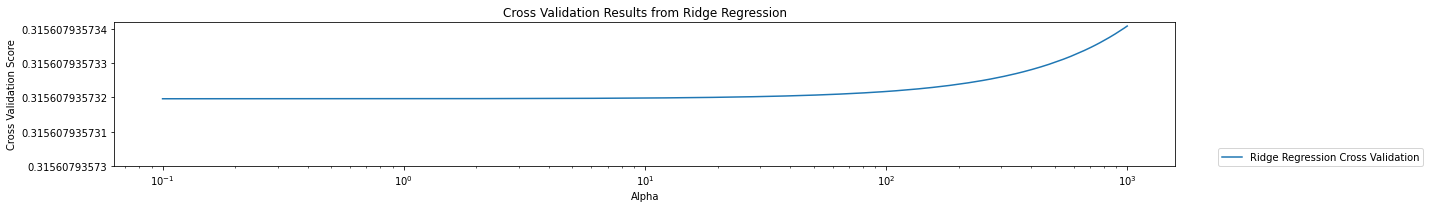

In [55]:
#Plot Cross Validation results from Ridge Regression
plt.rcParams["figure.figsize"] = (20,3)
plt.title("Cross Validation Results from Ridge Regression")
plt.plot(alphas_model1, mean_validation_scores_model1, label= "Ridge Regression Cross Validation")
#plt.errorbar(alphas_model1, mean_validation_scores_model1, std_validation_scores_model1, fmt = "o")
plt.legend(loc = (1.04, 0))
plt.xscale("log")
plt.yticks([0.31560793573, 0.315607935731,  0.315607935732, 0.315607935733, 0.315607935734], [0.31560793573, 0.315607935731,  0.315607935732, 0.315607935733, 0.315607935734])

plt.xlabel('Alpha')
plt.ylabel('Cross Validation Score')
plt.tight_layout()
plt.show()


In this section, I am plotting the cross validation results for Ridge Regression. Clearly, the cross validation score is best when the alpha parameter was roughly 1000.

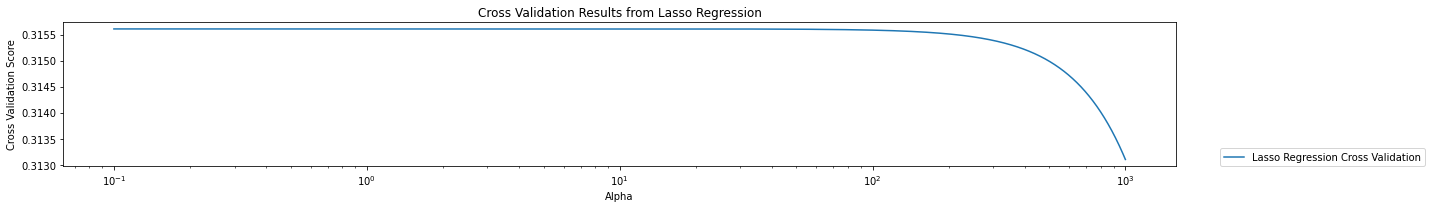

In [56]:
#Plot Cross Validation results from Lasso Regression
plt.rcParams["figure.figsize"] = (20,3)
plt.title("Cross Validation Results from Lasso Regression")
plt.plot(alphas_model2, mean_validation_scores_model2, label= "Lasso Regression Cross Validation")
#plt.errorbar(alphas_model2, mean_validation_scores_model2, std_validation_scores_model2, fmt = "o")
plt.legend(loc = (1.04, 0))
plt.xscale("log")

plt.xlabel('Alpha')
plt.ylabel('Cross Validation Score')
plt.tight_layout()
plt.show()


In this section, I am plotting the cross validation results for Lasso Regression. Clearly, the cross validation score is best when the alpha parameter was roughly 5.

In [57]:
start = time.time() #start time that we are beginning our training for Ridge Regression
model1 = Ridge(best_alpha_model1).fit(X_train, Y_train) #fit a Linear Regression(i.e. Ridge Regression) model to the data
end = time.time()

print("Time Elapsed to train Ridge Regression: ", end - start)

prediction = model1.predict(X_train) #make prediction for training data
r_squared_score = r2_score(Y_train, prediction) #calculate R^2 statistic for ridge regression model over training data
print("R Squared Score for Training Data: ", r_squared_score) #print R^2 score for training for ridge regression




Time Elapsed to train Ridge Regression:  0.0030269622802734375
R Squared Score for Training Data:  0.31647042912522494


Furthermore, I am training a Ridge Regression Model based on the $\lambda$ parameter that I found to be best during cross validation. the fit(X, Y) function literally fits a Ridge Regression model where X is the training data and Y is the training labels. 

In this section, I am determining the time taken to train the Ridge Regression Model. Furthermore, I am also determining the $R^{2}$ score for the Ridge Regression Model on the training data. The $R^{2}$  for Training Data is roughly 0.31647, meaning that the linear regression model does not capture a significant amount the variation in the training data. 

The predict() function takes a dataset and returns the model's predictions for each data sample in the dataset. 

The r2_score() function takes the expected labels and the predictions and computes $R^{2}$ score

In [58]:
start = time.time() #start time that we are beginning our training for Lasso Regression
model2 = Lasso(best_alpha_model2).fit(X_train, Y_train) #fit a Linear Regression(i.e. Lasso Regression) model to the data
end = time.time() 
print("Time Elapsed to Train Lasso Regression Model: ", end - start)

prediction = model2.predict(X_train) #make prediction for training data
r_squared_score = r2_score(Y_train, prediction) #calculate R^2 statistic for lasso regression model over training data
print("R Squared Score for Training Data: ", r_squared_score) #print R^2 score for lasso regression over training data


Time Elapsed to Train Lasso Regression Model:  0.0031349658966064453
R Squared Score for Training Data:  0.3164703633020606


Furthermore, I am training a Lasso Regression Model based on the $\lambda$ parameter that I found to be best during cross validation. the fit(X, Y) function literally fits a Lasso Regression model where X is the training data and Y is the training labels. 

In this section, I am determining the time taken to train the Lasso Regression Model. Furthermore, I am also determining the $R^{2}$ score for the Lasso Regression Model on the training data. The $R^{2}$  for Training Data is roughly 0.31647, meaning that the linear regression model does not capture a significant amount the variation in the training data. 

The predict() function takes a dataset and returns the model's predictions for each data sample in the dataset. 

The r2_score() function takes the expected labels and the predictions and computes $R^{2}$ score

In our processing of the dataset, we see that est $\alpha$ value for Ridge regression is aproximately 999.0001 and the best $\alpha$ value for Lasso regression is 0.1. The two plots show the cross validation results from Ridge and Lasso regression respectively. In the two plots we can see the maximum validation score vs. Alpha values

We also see that the training time for Ridge Regression is roughly 0.0024 seconds and training time for Lasso is roughly 0.0032 seconds. Ridge regression took slightly less time to train compared to Lasso regression.

The predict() function takes a dataset and returns the model's predictions for each data sample in the dataset. 

The r2_score() function takes the training labels and the predictions and computes $R^{2}$ score

# **5. Comparative Analysis**

In [59]:
N, P = X_test.shape #calculate number of rowx in test dataset
start = time.time()
prediction = model1.predict(X_test) #make prediction for test data
end = time.time() 
print("Time Taken to Test Ridge Regression Model: ", end - start)
r_squared_score = r2_score(Y_test, prediction) #calculate R^2 test statistic for lasso regression model
print(f"R2 Test Statistic for Ridge Regression: {r_squared_score}") #print  R^2 test statistic for lasso regression model

Time Taken to Test Ridge Regression Model:  0.0010411739349365234
R2 Test Statistic for Ridge Regression: 0.31824360576112143


In [60]:
N, P = X_test.shape #calculate number of rowx in test dataset
start = time.time()
prediction = model2.predict(X_test) #make prediction for test data
end = time.time() 
print("Time Taken to Test Lasso Regression Model: ", end - start)
r_squared_score = r2_score(Y_test, prediction) #calculate R^2 test statistic for lasso regression model
print(f"R2 Test Statistic for Lasso Regression: {r_squared_score}") #print  R^2 test statistic for lasso regression model

Time Taken to Test Lasso Regression Model:  0.0009992122650146484
R2 Test Statistic for Lasso Regression: 0.31824690482420914


Doing a quick glance at the run times, we can see that the test time for Ridge regression is roughly 0.001 and the test time for Lasso regression is roughly 0.001 seconds. The $R^2$ statistic for Ridge regression is roughly 0.318 and the $R^2$ statistic for Lasso regression is roughly 0.318

The time taken to test the Lasso and Ridge Regression Models are roughly the same(i.e. around 0.001 seconds )

How should we evalute the performance of each method?

As shown in the analsis of the previous dataset (Netflix Stock Prices), the R^2 test statistic was analyzed. For this dataset, we will be using the same analysis. As we covered in lecture, the R^2 test statistic is calculated by the following formula: 
$$R^{2} = 1 - \frac{\sum_{i=1}^n (y_{i} - f(x_{i}))^2}{\sum_{i=1}^n (y_{i} - \hat{y})^2}$$

A brief explanation of notation. $\hat{y}$ refers to the mean of all the labels of our data sample. Each data sample is represented as ($(x_{i}, y_{i})$) where $x_{i}$ is the features and $y_{i}$ is the label. $f(x_{i})$ is the output of the regression model once we put the feature into the regression model. 

$\sum_{i=1}^n (y_{i} - f(x_{i}))^2$ is the Residual Sum of Squares and $\sum_{i=1}^n (y_{i} - \hat{y})^2$ is the Total Sum of Squares. 


What are we looking for with this test statistic? 

Well, as we stated in lecture, a higher $R^{2}$ indicates that our model is a better predictor. A $R^{2}$ value of 1 indicates that our model is essentially perfect because this would mean that our model predicts all the labels in our test dataset 100 percent accurately. On the other hand, a $R^{2}$ value of 0 means that our model is performing no better than a constant model(i.e. a model that just outputs the mean of the labels of the data samples). 

Explanation of test statistics that I observed: 

The $R^{2}$ value for the Ridge Regression and Lasso Regression model are both approximately 0.322. Hence, this indicates that the performance of both the Ridge Regression and Lasso Regression are roughly the same. Both Lasso and Ridge Regression were **not** able to produce Regression models that capture almost all of the variation in the labels of the original dataset(i.e. the price actual). 

Which model should we send into production?

Due to the fact that the $R^{2}$ values are roughly similar across Ridge and Lasso Regression, we will turn to computational complexity analysis and, since Ridge Regression takes less time to train on our training dataset, we recommend that Ridge Regression be put into production. For larger datasets, where training time could prove to be an issue, it is expected that Ridge Regression will train faster based on the experimental results obtained here. 

The time taken to test both Ridge and Lasso Regression models is almost identical due to the fact that they have the same model structure(i.e. both are forms of linear regression models). Hence, it is expected that the time taken to test these models should be almost identical. 


# **6. Discussion on Ethical Issues**

Machine learning can be a powerful tool in society to complete a variety tasks, such as prediction, and classification. While Machine learning can bring many benefits, machine learning also give rise to ethical concerns and issues. There are two main ethical issues specific to this machine learning task to predict energy prices: (1) Fairness, and (2) Safety and security. 

The accuracy of the machine learning model to predict energy prices poses a risk to the economy, energy companies and consumers. Consumers and stakeholders in energy companies can be harmed financially from such machine learning model. Such a machine learning model could create an 'unfair' space in the finanical sector the Energy industry. Energy prices are one of the most volatile assets in the world. If one could create a machine lerning model that can accurately predict energy prices, he or she would obviously have an unfair advantage over other investors. 

Not only can this machine learning model create unfairness in the financial sector, the machine learning model can also pose safety and security risks. The Energy industry is one of the most important sector that holds society together. Without the energy sector, there will be no power, electricity, gas, etc. If there was a malicious group with the intent to wreak havoc and harm society infrastructure, the group would only need to target the energy distribution centers, plants, or grid, that contributes a lot to the energy market. If the group could get there hands on such machine learning model to predict energy prices, the group would have access to unlimited information about the status and conditions of each generation plant in the dataset.

# **7. Bibliography**

Jhana, Nicholas. “Hourly Energy Demand Generation and Weather.” Kaggle, 10 Oct. 2019, https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather. 